In [1]:
import pandas as pd
import numpy as np
import xlrd
import matplotlib.pyplot as plt

In [2]:
path = r"C:\Users\USER\Documents\GitHub\cofico\cofico\FROM BIM MASTER TEMP 210412\Python\pyAutocad\CAD DATA\CHG_S_BA_01B_CL_(-3748120 675534)_210515--.json"
data = pd.read_json(path)
# print("__Index: ",data.index) # VIEW DATA INDEX INFORMATION
# print("__Columns: ",data.columns) # VIEW COLUMN NAMES
# print("__Column Value: ",data['Value']) # VIEW COLUMN (S)
# print("__Head : ",data.head()) #  VIEW TOP 5 ROWS DATA
# print("__Head 10: ",data.head(10)) #  VIEW TOP ROWS DATA
# print("__Tail: ",data.tail()) #  VIEW BOTTOM 5 ROWS DATA
# print("__Tail 10: ",data.tail(10)) #  VIEW BOTTOM ROWS DATA
data.info() # VIEW DATA INFORMATION IN GENERAL


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ProjectNumber              264 non-null    object 
 1   Disciptline                264 non-null    object 
 2   TranslateCoordinateSystem  264 non-null    object 
 3   BuildingRegion             264 non-null    object 
 4   BuildingLevel              264 non-null    object 
 5   DataType                   264 non-null    object 
 6   Category                   264 non-null    object 
 7   Layer                      264 non-null    object 
 8   Position X                 264 non-null    float64
 9   Position Y                 264 non-null    float64
 10  Position Z                 264 non-null    int64  
 11  Rotation                   264 non-null    int64  
 12  Value                      264 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 2

*******************
CLEAN DATA
*******************

In [3]:
newData = data.dropna() # CLEAN EMPTY CELLS
# print(newData.info())
# print(newData.head())
#CHANGE ORIGINAL DATA
data.dropna(inplace = True)
# print(data.info())
data.fillna(130,inplace = True) # REPLACE NULL DATA BY ANOTHER VALUE EX. 130
data['Value'].fillna(130,inplace = True) # REPLACE SPECIFIC COLUMN BY ANOTHER VALUE EX.130
# REPLACE BY CALCULATE "MEAN" or MEDIAN or MODE
#Mean = the average value (the sum of all values divided by number of values).
# Median = the value in the middle, after you have sorted all values ascending.
# Mode = the value that appears most frequently.
xx = data["Value"].mode()
data["Value"].fillna(xx, inplace = True)
data.dropna(subset=['Value'], inplace = True)

In [4]:
# REPLACE [row, column]
data.loc[7, 'Value'] = 'DHDH'

for x in data.index:
    if data.loc[x,"Value"] == "":
        data.loc[x,"Value"] == "DHDH"

In [5]:
#REMOVE DUPLICATE
# print(data.duplicated())
data.drop_duplicates(subset = ["Value"],inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252 entries, 0 to 263
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ProjectNumber              252 non-null    object 
 1   Disciptline                252 non-null    object 
 2   TranslateCoordinateSystem  252 non-null    object 
 3   BuildingRegion             252 non-null    object 
 4   BuildingLevel              252 non-null    object 
 5   DataType                   252 non-null    object 
 6   Category                   252 non-null    object 
 7   Layer                      252 non-null    object 
 8   Position X                 252 non-null    float64
 9   Position Y                 252 non-null    float64
 10  Position Z                 252 non-null    int64  
 11  Rotation                   252 non-null    int64  
 12  Value                      252 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 2

In [6]:
data.corr()# Show the relationship between the columns

,Position X,Position Y,Position Z,Rotation
Position X,1.000000,-0.267931,NaN,-0.144255
Position Y,-0.267931,1.000000,NaN,0.252948
Position Z,NaN,NaN,NaN,NaN
Rotation,-0.144255,0.252948,NaN,1.000000


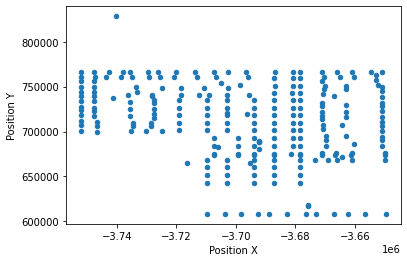

In [7]:
data.plot(kind = 'scatter', x = 'Position X', y = 'Position Y')
plt.show()

In [8]:
data['Value']

0      VA-2.7
1      VA-2.5
2      VA-2.6
3      VA-4.3
4      VA-4.4
        ...  
259     C3.21
260     C3.22
261     C3.27
262     C3.31
263     C3.24
Name: Value, Length: 252, dtype: object

In [9]:
valueArray = data[['Position X','Position Y','Rotation']].to_numpy()
indexValue  = data['Value']
columnValues = ['Position X','Position Y','Rotation']

In [11]:
newdata2 = pd.DataFrame(valueArray,index  = indexValue,columns = columnValues)
newdata2

,Position X,Position Y,Rotation
Value,,,
VA-2.7,-3695841.968,760498.230,90.0
VA-2.5,-3713040.858,760539.930,90.0
VA-2.6,-3706758.858,760539.930,90.0
VA-4.3,-3747873.168,743559.269,0.0
VA-4.4,-3747873.168,740015.371,0.0
...,...,...,...
C3.21,-3707448.807,675340.037,0.0
C3.22,-3707448.807,673952.552,0.0
C3.27,-3687048.807,675340.037,0.0


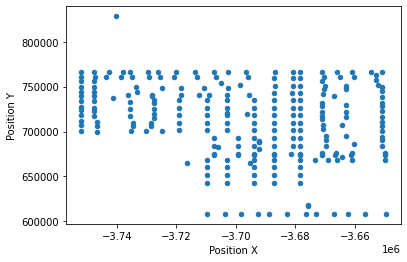

In [20]:
newdata2.plot(kind = 'scatter', x = 'Position X', y = 'Position Y') #RE CONSTRUCT NEW DATA CLEANED + FILTERED
plt.show()

# x = newdata2["Position X"]
# y = newdata2["Position Y"]
# plt.scatter(x, y)
# plt.show()


In [16]:
newdata2.sort_values(by="Position Y",inplace = True, ascending = False)
newdata2

,Position X,Position Y,Rotation
Value,,,
H1,-3740309.553,828325.567,0.0
C4.28,-3671145.199,766751.206,0.0
C4.27,-3678340.134,766751.206,0.0
C4.29,-3665970.199,766751.206,0.0
C4.26,-3680738.779,766751.206,0.0
...,...,...,...
C4.37,-3689020.199,608351.187,0.0
C4.35,-3698415.134,608351.187,0.0
C4.42,-3662140.134,608351.187,0.0
